In [1]:
import time
from torch import nn, optim, cuda
from torch.utils import data
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# barch_size : sample data 중 한 번에 네트워크에 넘겨주는 데이터의 수를 의미한다.
batch_size = 64
# batch_size = 1 

In [3]:
# cpu로 연산할 건지 아니면 gpu로 연산할건지 체크 gpu를 쓰고 있으면 거기에 맞게 사용, cpu를 쓰고 있으면 거기에 맞게 사용
device = 'cuda' if cuda.is_available() else 'cpu' 

In [4]:
# MNIST dataset 다운로드 받아서 원하는 폴더에 저장한다.
## TensorDataset : 설명변수(data), 목적변수(target(label))를 합쳐 하나의 데이터 집합으로 만든다.

train_dataset = datasets.MNIST(root='/content/mnist_data/', 
                              train=True, 
                              transform=transforms.ToTensor(),
                              download=True)

test_dataset = datasets.MNIST(root='/content/mnist_data/',
                             train=False,
                             transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/mnist_data/MNIST/raw




Extracting /content/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mnist_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/mnist_data/
    Split: Train
    StandardTransform
Transform: ToTensor()

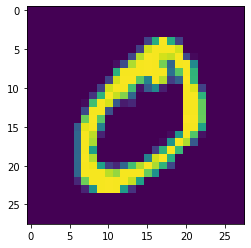

In [6]:
# plt.imshow(train_dataset[0][0][0])
plt.imshow(train_dataset[1][0][0])

In [7]:
# Data loader : 배치 사이즈에 맞게 데이터를 로드한다.
## 데이터셋을 불러와 학습에 활용할 수 있도록 원하는 크기의 미니배치로 나누어 읽어 들인다.
## 배치 사이즈가 4라는 의미는 이미지 4개를 한번에 넣어서 에러를 한번에 계산하고 그걸 이용해서 모두가 weigth 업데이트를 하는 것
## 배치 사이즈가 1이라는 의미는 이미지 매 한 장마다 weight 업데이트를 하는 것이다.
## shuffle 옵션 : trian 데이터 셋에서 데이터를 한 번 불러올 떄마다 데이터 순서를 랜덤하게 섞어서 불러올 것인지 아닌지
train_loader = data.DataLoader(dataset=train_dataset,
                               batch_size=batch_size,
                               shuffle=True)

test_loader = data.DataLoader(dataset=test_dataset,
                              batch_size=batch_size,
                              shuffle=False)

In [ ]:
for batch_id, (data, target) in enumerate(train_loader):
    print(f'batch_id: {batch_id}')
    print(f'data: {data}')
    print(f'target: {target}')

In [ ]:
class Net(nn.Module):

    ''' 
    [네트워크 정의]
    nn.Module : 일반적으로 필요한 변수, 메서드들이 있다.
    '''

    def __init__(self):
        super(Net, self).__init__()

        # 784 : 1 x 28 x 28
        self.l1 = nn.Linear(784, 520) # 첫 번째 레이어의 input feature는 784개이고 output feature는 520개이다.
        self.l2 = nn.Linear(520, 320) # 두 번째 레이어의 input feature는 520개이고 output feature는 320개이다.
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    # 그레이 이미지 : 1 x w x h
    # 컬러 이미지 : 3 x w x h
    # n : batch size
    # Flatten : 4차원짜리 텐서를 2차원짜리의 텐서로 변환한다.
    def forward(self, x):
        # -1의 의미는 "python! 너가 알아서 해줘"라는 의미다.
        # 즉, (-1, 784)의 의미는 앞에는 적당하게 맞추고 뒤에는 784로 맞춘다라는 의미이다.
        # 즉, 여기서는 -1은 알아서 batch size(64)로 변환된다.
        x = x.view(-1, 784) # Flatten the data ( n, 1, 28, 28 ) -> (n, 784), view : numpy에서의 reshape 메서드
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)

In [ ]:
class CNN(nn.Module):

    '''
    [네트워크 정의]
    CNN Network Architecture
    Convolution Layer
    
    '''

    def __init__(self):
        super(Net, self).__init__()

        # 784 : 1 x 28 x 28
        self.l1 = nn.Linear(784, 520) # 첫 번째 레이어의 input feature는 784개이고 output feature는 520개이다.
        self.l2 = nn.Linear(520, 320) # 두 번째 레이어의 input feature는 520개이고 output feature는 320개이다.
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    # 그레이 이미지 : 1 x w x h
    # 컬러 이미지 : 3 x w x h
    # n : batch size
    # Flatten : 4차원짜리 텐서를 2차원짜리의 텐서로 변환한다.
    def forward(self, x):
        # -1의 의미는 "python! 너가 알아서 해줘"라는 의미다.
        # 즉, (-1, 784)의 의미는 앞에는 적당하게 맞추고 뒤에는 784로 맞춘다라는 의미이다.
        # 즉, 여기서는 -1은 알아서 batch size(64)로 변환된다.
        x = x.view(-1, 784) # Flatten the data ( n, 1, 28, 28 ) -> (n, 784), view : numpy에서의 reshape 메서드
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)

In [ ]:
model = Net()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
# [epoch]
# 한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass / backward pass 과정을 거친 것을 말함. 
# 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태

def train(epoch):
    # 데이터를 이용하여 모델 학습
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() # 각각의 weight값을 업데이트할 때마다 초기화한다.
        output = model(data)
        loss = criterion(output, target)
        loss.backward() # weight update
        optimizer.step()

        if batch_idx % 10 == 0:
            print((f'Train Epoch : {epoch} | Batch Status : {batch_idx*len(data)}/{len(train_loader.dataset)}'
                  f'({100. * batch_idx / len(train_loader)}%) | Loss : {loss.item()}'))

In [ ]:
def test():
    # 학습된 모델의 성능 체크
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)

        # sum up batch loss
        test_loss += criterion(output, target).item()

        # get the index of the max
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        test_loss /= len(test_loader.dataset)
        print(f'==================\nTest set: Average loss : {test_loss:.4f}, Accuracy : {correct}/{len(test_loader.dataset)}'
            f'({100. * correct / len(test_loader.dataset):.0f}%)')
  

In [ ]:
# main

since = time.time()
for epoch in range(1, 10):
    epoch_start = time.time()
    train(epoch)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training time: {m:.0f}m {s:.0f}s')
    
test()
m, s = divmod(time.time() - epoch_start, 60)
print(f'Tesing time: {m:.0f}m {s:.0f}s')

m, s = divmod(time.time() - epoch_start, 60)
print(f'Total time : {m:.0f}m {s: .0f}s \nModel was trained on {device}!')

Train Epoch : 1 | Batch Status : 0/60000 (0%) | Loss : 2.295671
Train Epoch : 1 | Batch Status : 640/60000 (1%) | Loss : 2.291583
Train Epoch : 1 | Batch Status : 1280/60000 (2%) | Loss : 2.287664
Train Epoch : 1 | Batch Status : 1920/60000 (3%) | Loss : 2.311451
Train Epoch : 1 | Batch Status : 2560/60000 (4%) | Loss : 2.299667
Train Epoch : 1 | Batch Status : 3200/60000 (5%) | Loss : 2.306009
Train Epoch : 1 | Batch Status : 3840/60000 (6%) | Loss : 2.304360
Train Epoch : 1 | Batch Status : 4480/60000 (7%) | Loss : 2.307199
Train Epoch : 1 | Batch Status : 5120/60000 (9%) | Loss : 2.295210
Train Epoch : 1 | Batch Status : 5760/60000 (10%) | Loss : 2.303077
Train Epoch : 1 | Batch Status : 6400/60000 (11%) | Loss : 2.288997
Train Epoch : 1 | Batch Status : 7040/60000 (12%) | Loss : 2.294681
Train Epoch : 1 | Batch Status : 7680/60000 (13%) | Loss : 2.295134
Train Epoch : 1 | Batch Status : 8320/60000 (14%) | Loss : 2.294020
Train Epoch : 1 | Batch Status : 8960/60000 (15%) | Loss : 2.

KeyboardInterrupt: ignored